In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


# Import Required Libraries

In [2]:
# Basic Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#  Step 1: Exploratory Data Analysis (EDA)

## Step 1.1: Load the Dataset

In this step, we are loading the IBM HR Analytics dataset using the `pandas` library.  
We use `pd.read_csv()` to read the CSV file and store it in a variable called `df`.

Then we use `df.head()` to display the first 5 rows of the dataset.  
This helps us take a quick look at the structure and contents of the data.

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Show the first 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Step 1.2: Dataset Overview - Shape and Structure

In this step, we are checking:
- How many rows and columns are in the dataset using `df.shape`
- What types of data each column contains using `df.info()`

This helps us understand:
- How big the dataset is
- Which columns are numerical, categorical, or objects
- If there are any missing values (nulls)

This basic structure is very important to plan our analysis.

In [4]:
# Check the shape of the dataset
print("Number of rows and columns:", df.shape)

# Show basic info about columns (data types, non-null values)
df.info()

Number of rows and columns: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null

## Step 1.3: Missing Values and Summary Statistics

In this step, we do two things:

1. **Check for missing values**:
   We use `df.isnull().sum()` to count how many values are missing in each column.
   This helps us identify if we need to clean or fix any data.

2. **Get basic statistics**:
   We use `df.describe()` to see important summary statistics like:
   - Mean (average)
   - Minimum and maximum values
   - Standard deviation
   - Percentiles

These stats help us understand the range and distribution of numerical columns such as Age, MonthlyIncome, etc.

In [5]:
# Check for missing/null values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Get summary statistics for numerical columns
df.describe()

Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Step 1.4: Visualize Employee Attrition (Target Variable)

In this step, we are visualizing the number of employees who left the company vs who stayed.

- The "Attrition" column has two values: "Yes" (employee left) and "No" (employee stayed).
- We use `sns.countplot()` to create a bar chart.
- This helps us quickly see how balanced or imbalanced our data is.

Understanding the target variable (Attrition) is the first step in building a good model.

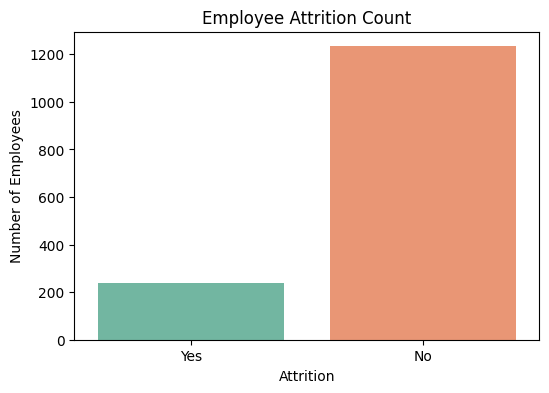

In [6]:
# Plot the count of Attrition (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

## Step 1.5: Analyze Categorical Features vs Attrition

Here, we are checking how employee attrition is affected by different categorical features:

1. **Gender** – Are more males or females leaving?
2. **Department** – Which department has the highest attrition?
3. **Marital Status** – Are single, married, or divorced employees leaving more?

We use `sns.countplot()` with the `hue='Attrition'` option to break down the attrition by each category.

These insights help us identify target areas for retention strategies.

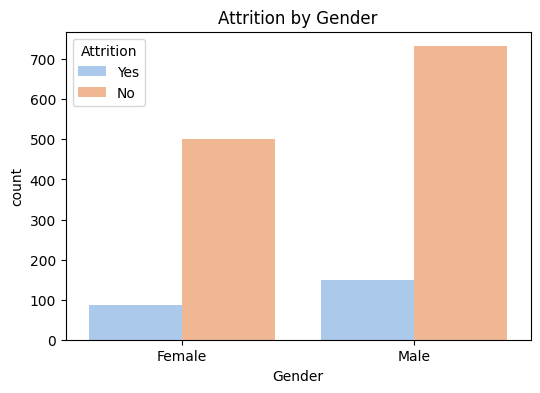

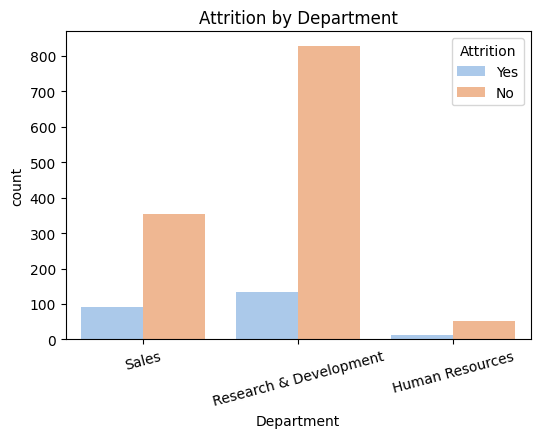

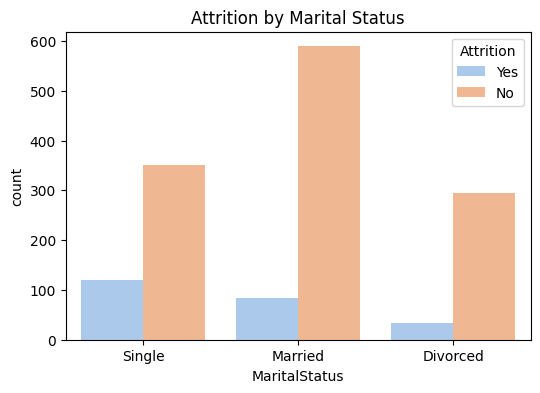

In [7]:
# Plot Attrition by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel')
plt.title('Attrition by Gender')
plt.show()

# Plot Attrition by Department
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel')
plt.title('Attrition by Department')
plt.xticks(rotation=15)
plt.show()

# Plot Attrition by Marital Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='pastel')
plt.title('Attrition by Marital Status')
plt.show()

## Step 1.6: Analyze Numerical Features vs Attrition

In this step, we examine how numerical features relate to attrition:

1. **Age** – Are younger or older employees more likely to leave?
2. **Monthly Income** – Do employees with lower salaries leave more?
3. **Years at Company** – Is there a pattern based on how long an employee has worked?

We use `sns.kdeplot()` (Kernel Density Plot) to show the distribution of each feature for employees who left and who stayed.

These visualizations help us understand trends and potential reasons behind attrition.

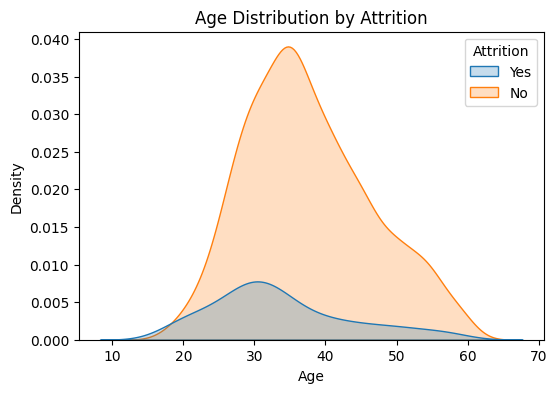

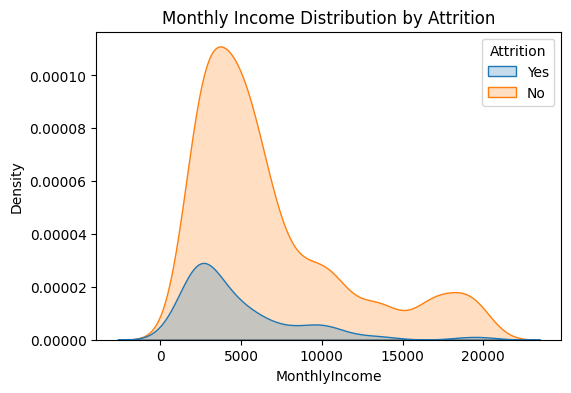

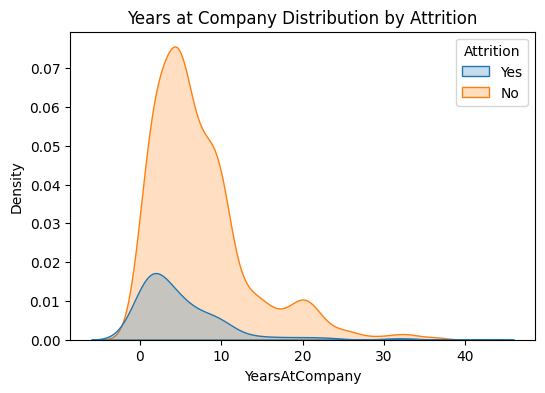

In [8]:
# Convert 'Attrition' to numeric: Yes = 1, No = 0 (for plotting purposes)
df['Attrition_numerical'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot: Age vs Attrition
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Age', hue='Attrition', fill=True)
plt.title('Age Distribution by Attrition')
plt.show()

# Plot: Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='MonthlyIncome', hue='Attrition', fill=True)
plt.title('Monthly Income Distribution by Attrition')
plt.show()

# Plot: Years at Company vs Attrition
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='YearsAtCompany', hue='Attrition', fill=True)
plt.title('Years at Company Distribution by Attrition')
plt.show()

## Step 1.7: Correlation Heatmap

In this step, we create a correlation heatmap for all numerical features to see how strongly they are related to each other — especially to the "Attrition" variable.

### What is Correlation?
Correlation measures how one variable changes with another:
- A value close to 1 = strong positive relation
- A value close to -1 = strong negative relation
- A value close to 0 = no relation

We:
- Converted 'Attrition' to numeric (1 = Yes, 0 = No)
- Calculated the correlation matrix
- Used a heatmap to visualize all correlations

Look for features that have a **high correlation (positive or negative)** with Attrition. These are likely to be **important for prediction**.

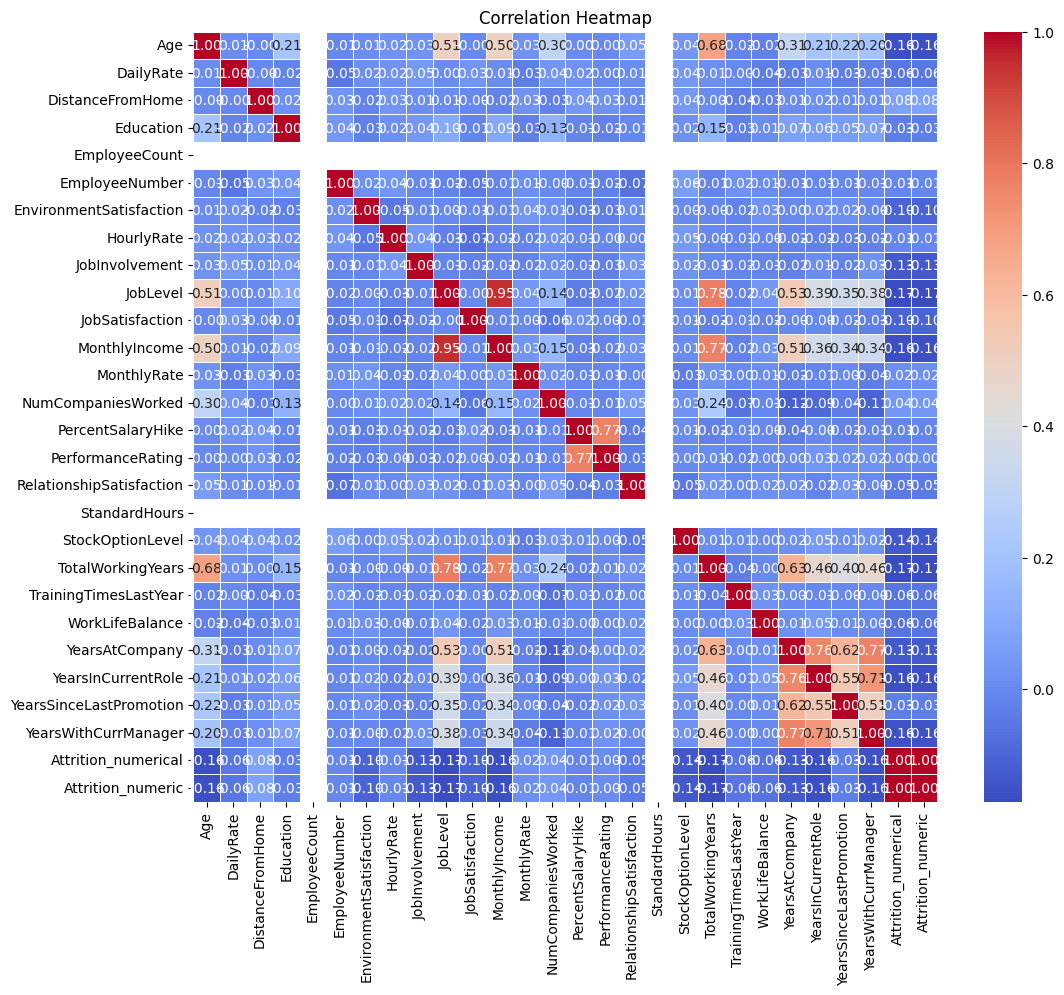

In [9]:
# Encode 'Attrition' as a number for correlation (Yes = 1, No = 0)
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 2: Model Building
We’ll build a classification model to predict whether an employee will leave the company.

We'll use:

Logistic Regression (simple and interpretable)

Random Forest (more powerful, good for feature importance)

But before training the models, we must prepare the data.

## Step 2.1: Data Preprocessing - Encoding Categorical Features

In this step, we prepare the data for machine learning.

1. **Remove useless columns**:
   - Columns like "EmployeeCount", "Over18", and "StandardHours" have the same value for all rows, so we drop them.
   - We also drop the original "Attrition" (Yes/No) and use the numeric version instead.

2. **Encode Categorical Features**:
   - We use `pd.get_dummies()` to convert text values (e.g. "Male", "Sales") into numbers.
   - We use `drop_first=True` to avoid multicollinearity.

3. **Attach the Target Variable**:
   - We add back the numeric "Attrition" column as our target for prediction.

Now the dataset is ready for model training!

In [10]:
# Drop unnecessary columns that won't help the model
df_model = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'Attrition', 'Attrition_numerical'], axis=1)

# Convert categorical columns to dummy variables (One-Hot Encoding) + convert to integers
df_model = pd.get_dummies(df_model, drop_first=True).astype(int)

# Add the target variable (Attrition_numeric)
df_model['Attrition'] = df['Attrition_numeric']

# Check the shape and first few rows
print("Shape after encoding:", df_model.shape)
df_model.head()

Shape after encoding: (1470, 47)


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,0,0


## Step 2.2: Train-Test Split

Before training our machine learning model, we split the dataset into:

- **X (features)**: All columns except "Attrition"
- **y (target)**: The "Attrition" column

We use `train_test_split()` from `sklearn.model_selection`:
- 80% data goes to the training set
- 20% data goes to the testing set
- `random_state=42` ensures reproducibility
- `stratify=y` keeps the same ratio of Yes/No attrition in both sets (important for imbalanced data)

This helps evaluate how well our model will generalize to new/unseen data.

In [15]:
# Drop the target column if it's still in features
X = df_model.drop(['Attrition', 'Attrition_numeric'], axis=1, errors='ignore')
y = df_model['Attrition']  # This stays as the correct target

# Redo train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Print shapes to verify
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (1176, 45)
Testing set: (294, 45)


## Step 2.3: Train Logistic Regression Model

In this step, we train a **Logistic Regression** model to predict employee attrition (Yes or No).

- We use `LogisticRegression()` from `sklearn.linear_model`.
- `max_iter=1000` increases the number of iterations so the model can converge.
- `fit(X_train, y_train)` trains the model using training data.
- `predict(X_test)` makes predictions on the test set.

### Evaluation:
- `accuracy_score` tells us the percentage of correct predictions.
- `classification_report` shows precision, recall, and F1-score.
- `confusion_matrix` shows how many employees were correctly/incorrectly predicted as leaving or staying.

This helps us understand how well the model is performing.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8605442176870748

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.80      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.83      0.58      0.60       294
weighted avg       0.85      0.86      0.82       294


Confusion Matrix:
 [[245   2]
 [ 39   8]]


## Step 2.4: Train Random Forest Model

In this step, we train a **Random Forest** model to predict employee attrition.

- `RandomForestClassifier` creates multiple decision trees and combines their results.
- `n_estimators=100` means it builds 100 trees.
- `random_state=42` ensures consistent results every time you run it.

### Evaluation Metrics:
- `accuracy_score`: Overall prediction correctness.
- `classification_report`: Shows precision, recall, and F1-score.
- `confusion_matrix`: Details correct and incorrect predictions.

Random Forest often performs better than Logistic Regression, especially with complex or non-linear patterns.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294


Confusion Matrix:
 [[240   7]
 [ 42   5]]


# Step 3: Model Explainability using SHAP
Objective:
We want to understand which features (columns) are most responsible for predicting whether an employee will leave the company.

## Step 3.1: Initialize SHAP for Model Explanation

We use the SHAP library to understand which features influence the model’s decision.

- `TreeExplainer`: Specialized SHAP explainer for tree-based models like Random Forest.
- `shap_values`: Quantifies the impact of each feature on the model’s prediction.
- `shap.initjs()`: Loads JavaScript visualizations in the notebook.

This will help us visualize which employee factors lead to attrition.

In [18]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Create the explainer based on the trained Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Initialize JavaScript visualization (for SHAP plots)
shap.initjs()

## Step 3.2: SHAP Summary Plot (Global Feature Importance)

This summary plot shows which features have the greatest impact on predicting employee attrition.

- Each dot represents a single employee.
- The color represents the value of the feature (red = high, blue = low).
- Features at the top are the most important.
- If a red dot is far right → high value of that feature increases attrition.
- If a blue dot is far left → low value of that feature decreases attrition.

This helps HR understand what factors most influence attrition decisions.

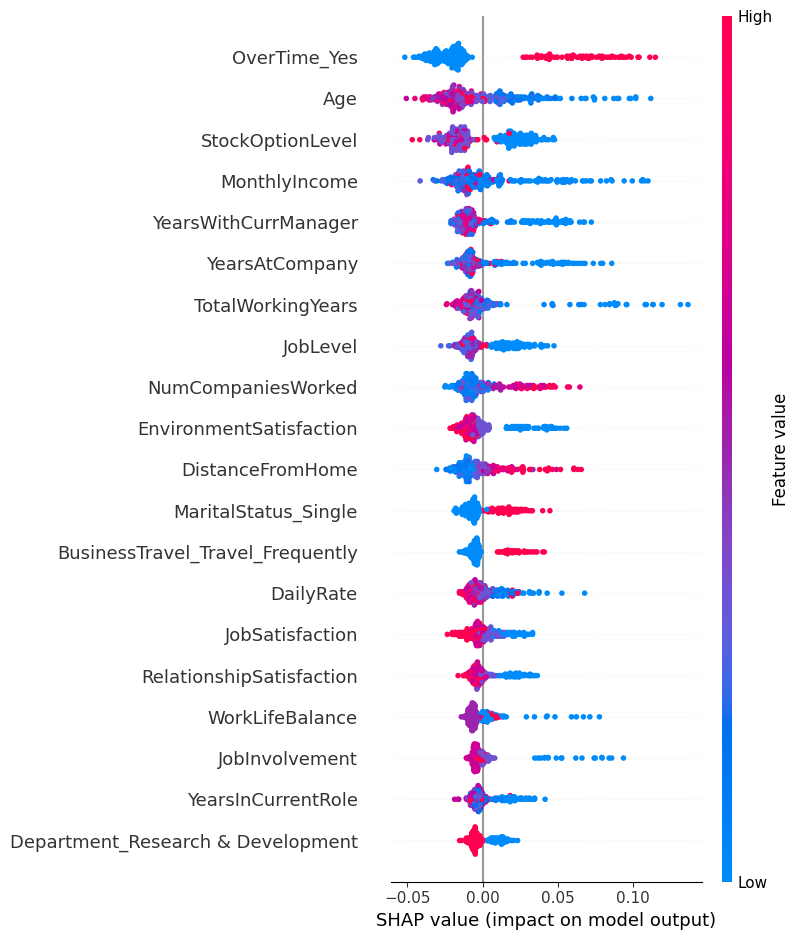

In [19]:
# Summary plot (global feature importance)
shap.summary_plot(shap_values[1], X_test)

## Step 3.3: SHAP Force Plot (Single Prediction Explanation)

This plot explains why the model predicted a certain employee would leave or stay.

- The base value (gray line) is the average prediction.
- Red bars push the prediction towards "Yes Attrition".
- Blue bars push it towards "No Attrition".
- The longer a bar, the more that feature influenced the result.

This helps HR see which exact factors affected an individual prediction.

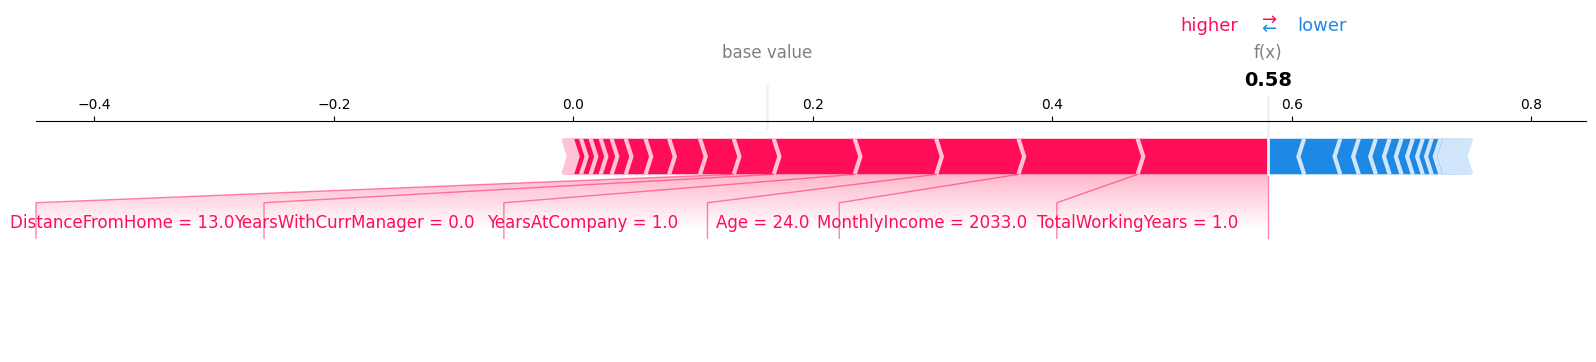

In [25]:
# Pick an example from the test set (index 0 for now)
i = 0

# Force plot for the selected instance
shap.force_plot(
    explainer.expected_value[1],      # base value for class 1
    shap_values[1][i],                # SHAP values for this instance
    X_test.iloc[i],                   # Feature values for this instance
    matplotlib=True
)

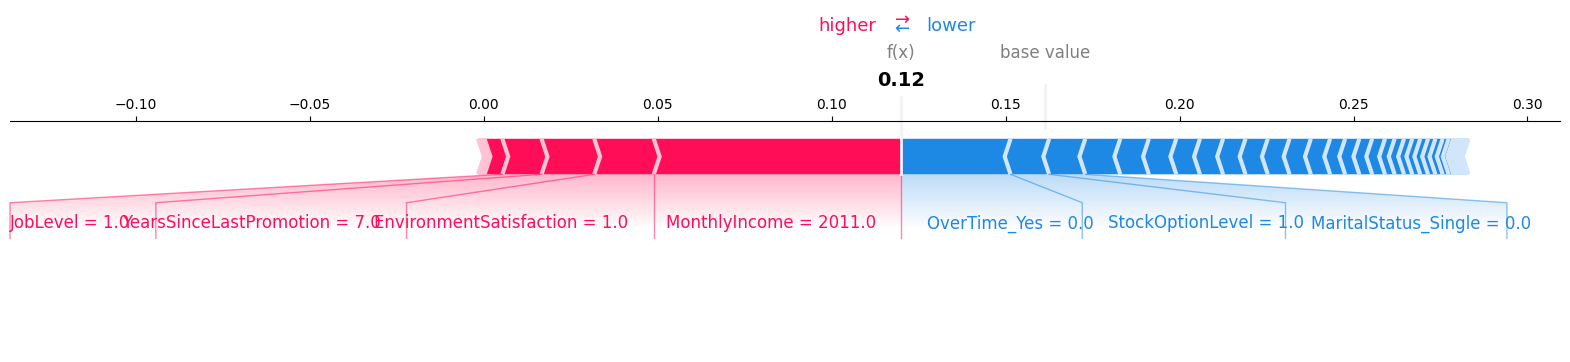

In [26]:
# Pick an example from the test set (index 0 for now)
i = 1

# Force plot for the selected instance
shap.force_plot(
    explainer.expected_value[1],      # base value for class 1
    shap_values[1][i],                # SHAP values for this instance
    X_test.iloc[i],                   # Feature values for this instance
    matplotlib=True
)

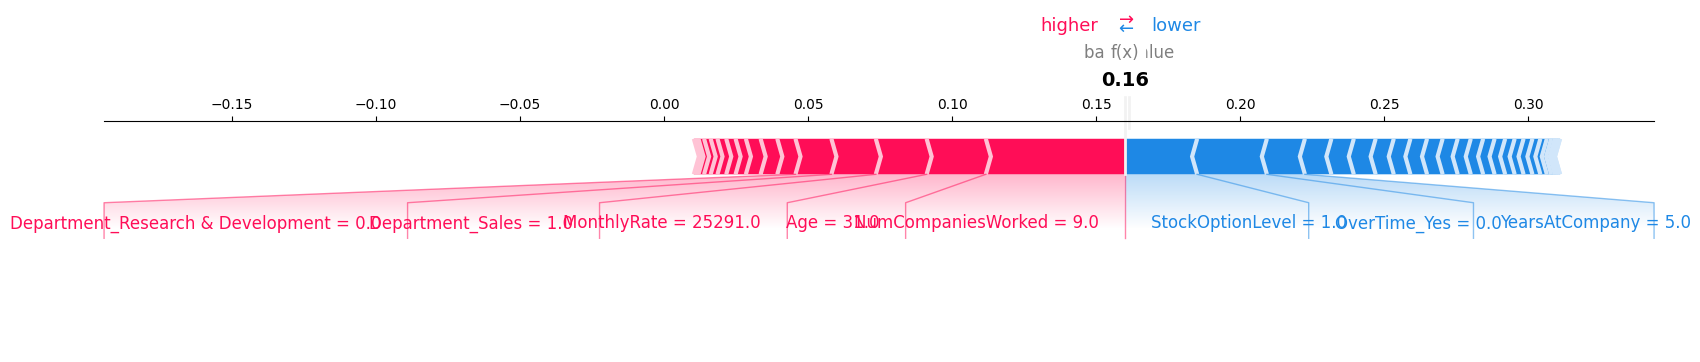

In [27]:
# Pick an example from the test set (index 0 for now)
i = 2

# Force plot for the selected instance
shap.force_plot(
    explainer.expected_value[1],      # base value for class 1
    shap_values[1][i],                # SHAP values for this instance
    X_test.iloc[i],                   # Feature values for this instance
    matplotlib=True
)

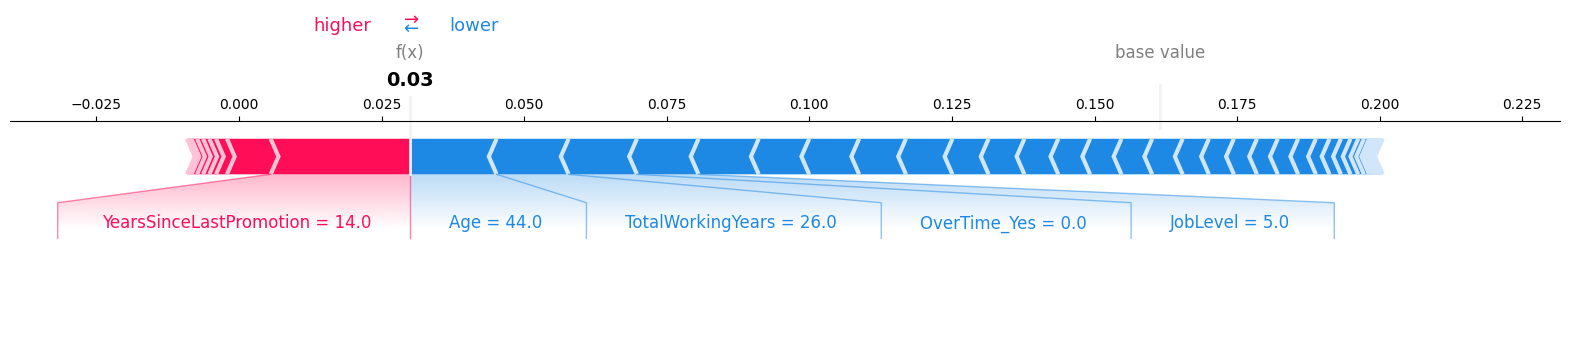

In [28]:
# Pick an example from the test set (index 0 for now)
i = 3

# Force plot for the selected instance
shap.force_plot(
    explainer.expected_value[1],      # base value for class 1
    shap_values[1][i],                # SHAP values for this instance
    X_test.iloc[i],                   # Feature values for this instance
    matplotlib=True
)

# Step 4: Actionable HR Insights (Retention Strategies) & Recommendations
Goal:
Use your EDA + Model + SHAP explainability to give practical suggestions to HR for reducing employee attrition.

### Project Overview:

This project uses the IBM HR Analytics dataset to predict employee attrition using machine learning. After training classification models and interpreting them with SHAP, we identified key factors contributing to employee turnover and proposed HR strategies to reduce attrition.


### Key Insights from SHAP Analysis:

1. **OverTime_Yes**  
   - Employees who work overtime are significantly more likely to leave.

2. **Age**  
   - Younger employees (especially under 30) show a higher chance of attrition.

3. **StockOptionLevel**  
   - Employees with fewer stock options are more prone to leave.

4. **MonthlyIncome**  
   - Lower-income employees are more likely to leave.

5. **YearsWithCurrManager**  
   - Employees who haven't worked long with their current manager are more at risk.

These insights were derived from SHAP summary plots, which explain model predictions based on feature impact.


### HR Recommendations to Reduce Attrition:

1. **Monitor and Reduce Overtime**  
   - Promote work-life balance, and prevent employee burnout.

2. **Support Young Talent**  
   - Create fast-track growth programs and mentorships for younger employees.

3. **Review Compensation Packages**  
   - Increase base pay or bonuses for lower-income groups.

4. **Provide Stock Options**  
   - Offer performance-based incentives to enhance long-term retention.

5. **Strengthen Manager-Employee Relationships**  
   - Encourage regular check-ins, feedback sessions, and transparent communication.

Implementing these strategies can help reduce turnover and improve employee satisfaction.


# The End